C:\Users\benj\AppData\Local\Temp\ipykernel_5648\2969021467.py:74: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(fern_3d_pts[:, 0], fern_3d_pts[:, 1], fern_3d_pts[:, 2], c='blue', cmap=cm.viridis)


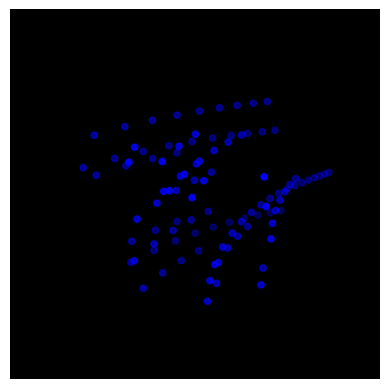

'\nNote:\nThe image frames were stitched together using FFMPEG\nffmpeg -framerate 25 -i fern_point_%05d.png BarnsleyFernFractalSimulation.mp4\nMicrosoft Clipchamp was used to increase the speed of the video\n'

In [37]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

"""
The vector components that represent the fractal
More information can be found here: https://en.wikipedia.org/wiki/Barnsley_fern
"""
def function1(x, y):
    return (0, 0.16 * y)

def function2(x, y):
    return (0.85 * x + 0.04 * y, -0.04 * x + 0.85 * y + 1.6)

def function3(x, y):
    return (0.20 * x - 0.26 * y, 0.23 * x + 0.22 * y + 1.6)

def function4(x, y):
    return (-0.15 * x + 0.28 * y, 0.26 * x + 0.24 * y + 0.44)

# Store into list
functions = [function1, function2, function3, function4]

# Image size
WIDTH, HEIGHT = 1920, 1080
DATAPOINTS = 100
x, y = 0, 0
fern_image = np.zeros((HEIGHT, WIDTH, 3))  # Use 3 channels for RGB colors
    
# Set the entire background to black
fern_image[:] = [0, 0, 0]

# Create a directory to save images if it doesn't exist
import os
if not os.path.exists("images"):
    os.makedirs("images")
    
fern_3d_pts = []
    
for i in range(DATAPOINTS):
    function = np.random.choice(functions, p=[0.01, 0.85, 0.07, 0.07])
    x, y = function(x, y)
    shift_x, shift_y = int(WIDTH / 2 + x * WIDTH / 10), int(y * HEIGHT / 12)
    
    fern_3d_pts.append((shift_x, shift_y, i))

    # Set each shifted pixel to be blue
    fern_image[shift_y, shift_x] = [0, 0, 255]

    # Normalize the image
    fern_image_normalized = fern_image / 255.0

    # Save the image
    filename = f"images/fern_point_{i:05d}.png"
    plt.imsave(filename, fern_image_normalized, dpi=300)

plt.close()

fern_3d_pts = np.array(fern_3d_pts)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('black')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
plt.axis('off')
ax.view_init(ax.elev, ax.azim)
ax.scatter(fern_3d_pts[:, 0], fern_3d_pts[:, 1], fern_3d_pts[:, 2], c='blue', cmap=cm.viridis)
plt.show()
    
"""
Note:
The image frames were stitched together using FFMPEG
ffmpeg -framerate 25 -i fern_point_%05d.png BarnsleyFernFractalSimulation.mp4
Microsoft Clipchamp was used to increase the speed of the video
"""